# Project Team B EDA Analysis

In [155]:
import pandas as pd
import datetime as dt
import json
import ast
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [143]:
movies = pd.read_csv('movies_clean.csv')

In [144]:
movies.columns

Index(['index', 'adult', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

1. which are the top 10 movies of all time?

In [145]:
movies['total_score'] =  movies['vote_average']*movies['vote_count']

In [149]:
weight_vote = 0.7
weight_count = 0.3

movies['popularity_score'] = (movies['vote_average'] * weight_vote) + (movies['vote_count'] * weight_count)


In [152]:
scaler = StandardScaler()
movies['normalized_popularity'] = scaler.fit_transform(movies[['popularity_score']])

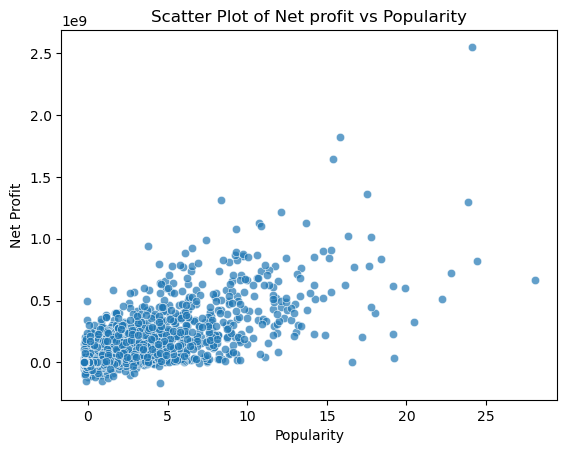

In [186]:
movies['net'] = movies['revenue'] - movies['budget']

sns.scatterplot(x='normalized_popularity', y='net', data=movies, marker='o', alpha=0.7)

# Set plot labels and title
plt.xlabel('Popularity')
plt.ylabel('Net Profit')
plt.title('Scatter Plot of Net profit vs Popularity')

plt.savefig('scatter_net_pop.png', bbox_inches='tight')

# Show the plot
plt.show()



<Figure size 640x480 with 0 Axes>

In [174]:
movies_10 = movies.sort_values(by = 'normalized_popularity', ascending = False).head(10)[['normalized_popularity','original_title','net']]

C:\Users\karap\AppData\Local\Temp\ipykernel_11276\3526101185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='original_title', y='net', data=movies_10, palette='Set1')


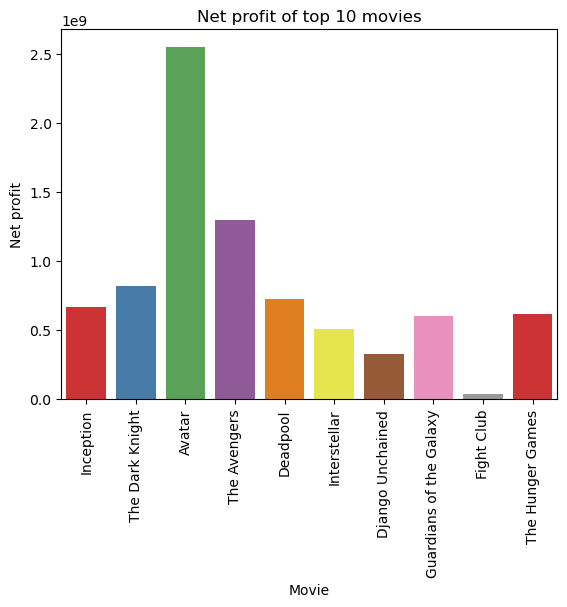

In [183]:
sns.barplot(x='original_title', y='net', data=movies_10, palette='Set1')
plt.xticks(rotation=90)

plt.xlabel('Movie')
plt.ylabel('Net profit')
plt.title('Net profit of top 10 movies')
plt.savefig('top10mov.png', bbox_inches='tight')

plt.show()

In [187]:
movies.to_csv('movies_new.csv', index=False)